In [93]:
import math
import matplotlib.pyplot as plt

world_cities = {
    "Moscow": { "lat": 55.7558, "lon": 37.6176, "country": "Russia"},
    "Tokyo": { "lat": 35.6762, "lon": 139.6503, "country": "Japan"},
    "New York": { "lat": 40.7128, "lon": -74.0060, "country": "USA"},
    "Sydney": { "lat": -33.8688, "lon": 151.2093, "country": 'Australia'},
    "London": { "lat": 51.5074, "lon": -0.1278, "country": "UK"},
    "Cairo": { "lat": 30.0444, "lon": 31.2357, "country": "Egypt"}
}

print("🌍 База данных городов создана!")

print(f"Всего городов: {len(world_cities)}")

for city, info in world_cities.items():
    print(f"{city}: {info['lat']:.2f}°, {info['lon']:.2f}°, ({info['country']})")

🌍 База данных городов создана!
Всего городов: 6
Moscow: 55.76°, 37.62°, (Russia)
Tokyo: 35.68°, 139.65°, (Japan)
New York: 40.71°, -74.01°, (USA)
Sydney: -33.87°, 151.21°, (Australia)
London: 51.51°, -0.13°, (UK)
Cairo: 30.04°, 31.24°, (Egypt)


In [94]:
def analyze_location(lat, lon, city_name="Точка"): 
    if lat >= 0: 
        lat_hemisphere = 'Северное полушарие'
    else: 
        lat_hemisphere = 'Южное полушарие'

    lon_hemisphere = "Восточное полушарие" if lon >=0 else "Западное полушарие"

    abs_lat = abs(lat)

    if abs_lat >=66.5: 
        climate = "Полярный (за полярным кругом)"
    elif abs_lat >=40: 
        climate = "Умеренный"
    elif abs_lat >=23.5:
        climate = "Субтропический"
    else: 
        climate = "Тропический"

    equator_distance = abs(lat) * 111

    print(f"\n Анализ для города {city_name}:")
    print(f" Координаты: {lat:.2f}°, {lon:.2f}°")
    print(f" Полушарие: {lat_hemisphere}, и {lon_hemisphere}")
    print(f" Климатический пояс: {climate}")
    print(f" Расстояние до экватора:{equator_distance:.0f} км")

    return { 
        "hemisphere": (lat_hemisphere, lon_hemisphere),
        "climate": climate,
        "equator_distance": equator_distance
    }

for city, coords in world_cities.items():
    analyze_location(coords["lat"], coords["lon"], city)





 Анализ для города Moscow:
 Координаты: 55.76°, 37.62°
 Полушарие: Северное полушарие, и Восточное полушарие
 Климатический пояс: Умеренный
 Расстояние до экватора:6189 км

 Анализ для города Tokyo:
 Координаты: 35.68°, 139.65°
 Полушарие: Северное полушарие, и Восточное полушарие
 Климатический пояс: Субтропический
 Расстояние до экватора:3960 км

 Анализ для города New York:
 Координаты: 40.71°, -74.01°
 Полушарие: Северное полушарие, и Западное полушарие
 Климатический пояс: Умеренный
 Расстояние до экватора:4519 км

 Анализ для города Sydney:
 Координаты: -33.87°, 151.21°
 Полушарие: Южное полушарие, и Восточное полушарие
 Климатический пояс: Субтропический
 Расстояние до экватора:3759 км

 Анализ для города London:
 Координаты: 51.51°, -0.13°
 Полушарие: Северное полушарие, и Западное полушарие
 Климатический пояс: Умеренный
 Расстояние до экватора:5717 км

 Анализ для города Cairo:
 Координаты: 30.04°, 31.24°
 Полушарие: Северное полушарие, и Восточное полушарие
 Климатический п

In [95]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0 #Earth radius in kilometers

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    # (math.sin(dlat/2)**2 = квадрат синуса половины разности широт)

    a = (math.sin(dlat/2)**2 + 
           math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2)
    
    c = 2*math.asin(math.sqrt(a))

    return R * c

moscow_coords = world_cities["Moscow"]

print("\n🛫 Расстояние между городами:")

for city, coords in world_cities.items():

    if city != "Moscow":
        distance = haversine_distance(
            moscow_coords["lat"], moscow_coords["lon"],
            coords["lat"], coords["lon"]
        )

        print(f"Москва → {city}: {distance:.0f} км")


🛫 Расстояние между городами:
Москва → Tokyo: 7477 км
Москва → New York: 7510 км
Москва → Sydney: 14496 км
Москва → London: 2501 км
Москва → Cairo: 2903 км


In [96]:
def find_nearest_cities(target_lat, target_lon, cities_dict, top_n=3):

    distances = []

    for city, coords in cities_dict.items():

        distance = haversine_distance(
            target_lat, target_lon,
            coords["lat"], coords["lon"]
        )

        distances.append((city, distance, coords))

    distances.sort(key=lambda x: x[1])

    return distances[:top_n]
    
paris_lat, paris_lon = 48.8566, 2.3522

print(f"\n 🔍 Ищем ближайшие города к точке {paris_lat}°, {paris_lon}°:")

nearest = find_nearest_cities(paris_lat, paris_lon, world_cities, top_n=3)

for i, (city, distance, coords) in enumerate(nearest, start=1):

    print(f"{i}. {city}: {distance:.0f} км ({coords['country']})")

        


 🔍 Ищем ближайшие города к точке 48.8566°, 2.3522°:
1. London: 344 км (UK)
2. Moscow: 2486 км (Russia)
3. Cairo: 3210 км (Egypt)


/var/folders/tq/c4pjvkh91w3ggrm6dfztclc00000gn/T/ipykernel_34021/1866805441.py:44: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


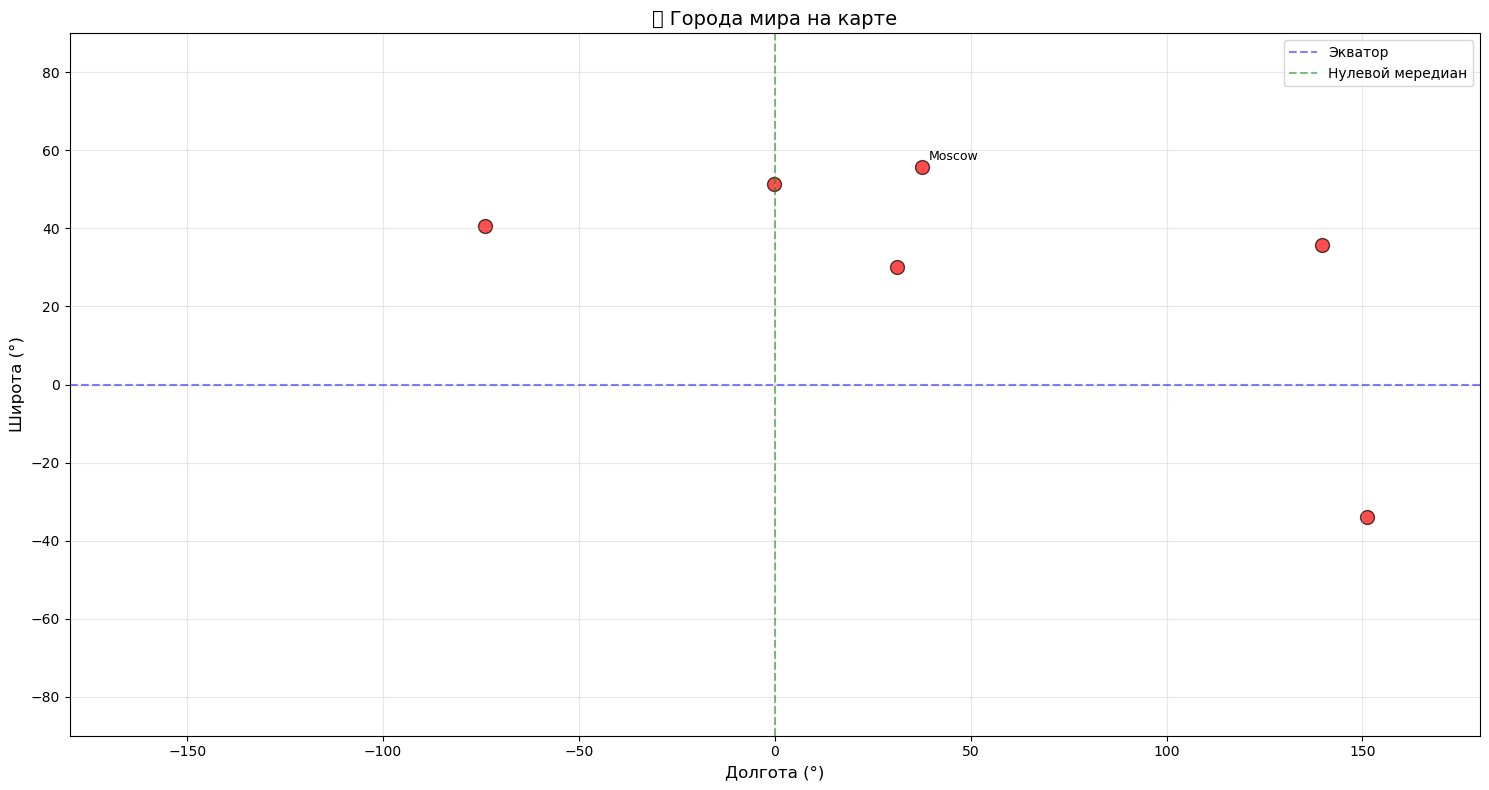

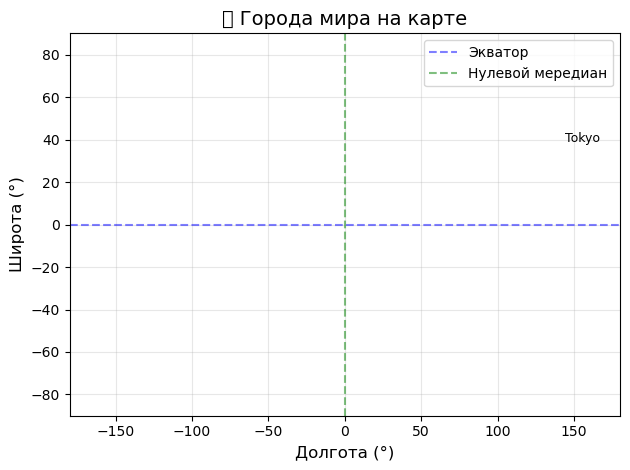

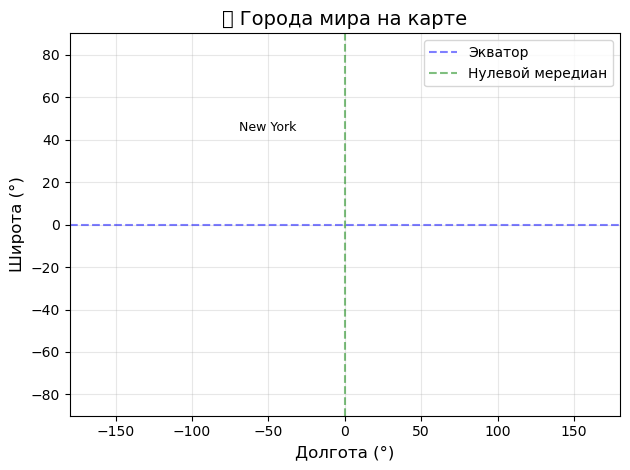

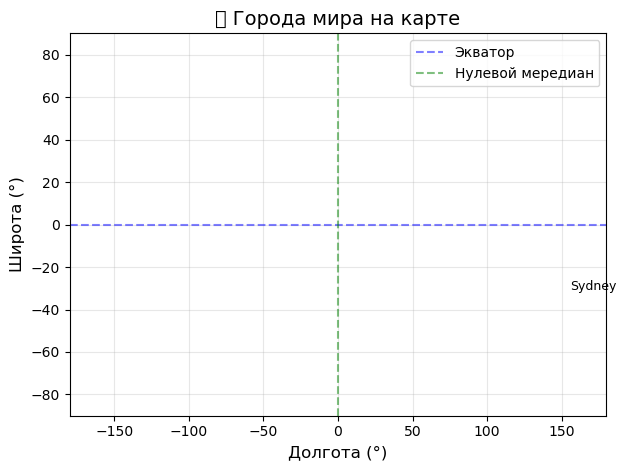

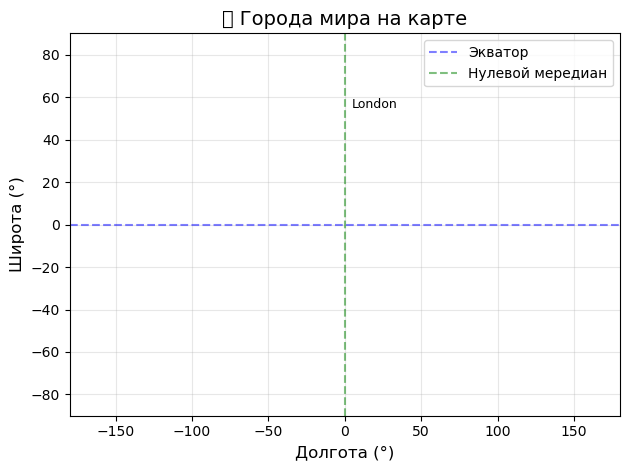

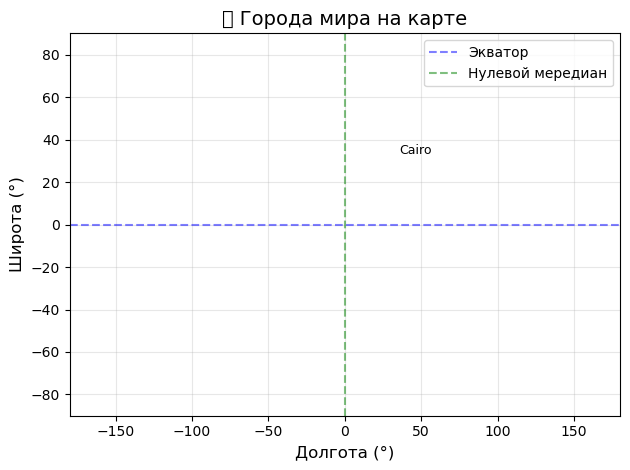

In [97]:
def plot_world_cities(cities_dict): 

    lats = [coords["lat"] for coords in cities_dict.values()]
    lons = [coords["lon"] for coords in cities_dict.values()]

    names = list(cities_dict.keys())

    plt.figure(figsize=(15, 8))

    plt.scatter(
        lons, lats,
        c="red",
        s=100,
        alpha=0.7,
        edgecolors="black",
        linewidth=1
    )

    for i, name in enumerate(names):

        plt.annotate(
            name,
            (lons[i], lats[i]),
            xytext=(5, 5,),
            textcoords='offset points',
            fontsize=9,
            ha='left',
        )

        plt.axhline(y=0, color='blue', linestyle='--', alpha=0.5, label='Экватор')
        plt.axvline(x=0, color='green', linestyle='--', alpha=0.5, label='Нулевой мередиан')

        plt.xlabel('Долгота (°)', fontsize=12)
        plt.ylabel('Широта (°)', fontsize=12)
        plt.title('🌍 Города мира на карте', fontsize=14)

        plt.grid(True, alpha=0.3)

        plt.legend()

        plt.xlim(-180, 180)
        plt.ylim(-90, 90)

        plt.tight_layout()

        plt.show()

plot_world_cities(world_cities)

